# Pareto Distributions
Let’s consider the following distribution:
\begin{eqnarray}
F_X(x) &= 1-\frac{x_m}{x}^\alpha \quad &\text{if}  \quad  x \geq x_m \\\
 &0 \quad  &\text{if}  \quad  x < x_m
\end{eqnarray}
\begin{eqnarray}
f_X(x) &= \frac{\alpha x_m^\alpha}{x^{\alpha +1}} \quad &\text{if}  \quad  x \geq x_m \\\
 &0 \quad  &\text{if}  \quad  x < x_m
\end{eqnarray}

### EXERCISES
1. Write a function for the Pareto PDF ($\alpha = 2$; $x_m = 1$), call it paretopdf.
2. Write a function for the Pareto CDF, call it paretocdf.
3. Plot the Pareto PDF
4. Define a grid x that covers (3,4), with step size d.
5. Evaluate Pareto density on x, store as fx.
6. Using the grid from 4., and fx, figure out a way to approximate the likelihood of the Pareto distributed random variable to lie within $[3,4]$.


### 1. Write a function for the Pareto PDF ( 𝛼=2 ;  𝑥𝑚=1 ), call it pareto_pdf.

Note that we can use default values for parameters in our function. We can then call this function without specifying them. But we can change them if we want. 

In [95]:
import numpy as np
import matplotlib.pyplot as plt

In [96]:
def pareto_pdf(x,alpha=2,x_m=1):
    
    #initialize output
    n = np.shape(x)[0]
    output = np.zeros(n)
    
    output_temp = (alpha*(x_m**alpha))*(x**(-alpha-1))
    
    output = np.where(x > x_m, output_temp, 0)
        
    return output

In [97]:
x_input = np.arange(10.0)
pareto_pdf(x_input)

C:\Users\email\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in power
  import sys


array([0.        , 0.        , 0.25      , 0.07407407, 0.03125   ,
       0.016     , 0.00925926, 0.0058309 , 0.00390625, 0.00274348])

In [98]:
def pareto_cdf(x,alpha=2,x_m=1):
    
    output_temp = 1- ( (x_m**alpha)*(x**(-alpha) ) )
    
    output = np.where(x > x_m, output_temp, 0)
        
    return output

### 2. Write a function for the Pareto CDF, call it pareto_cdf.

In [99]:
pareto_cdf(x_input)

C:\Users\email\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


array([0.        , 0.        , 0.75      , 0.88888889, 0.9375    ,
       0.96      , 0.97222222, 0.97959184, 0.984375  , 0.98765432])

### 3. Plot the Pareto PDF
See the other problem sets to see how to make the plot look better. 

C:\Users\email\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in power
  import sys


Text(0, 0.5, 'PDF')

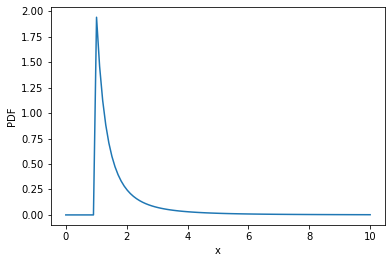

In [100]:
grid = np.linspace(0,10.0,100)
plt.plot(grid,pareto_pdf(grid))
plt.xlabel('x')
plt.ylabel('PDF')


### 4. Define a grid called x that covers (3,4), with step size d.

### 5. Evaluate Pareto density on x, store as fx.


C:\Users\email\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in power
  import sys


Text(0, 0.5, 'PDF')

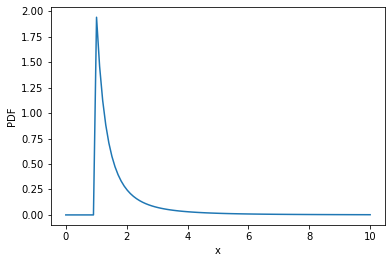

In [101]:
interval = np.array([3,4])
step_size = 0.01

# ARANGE ALLOWS USE TO USE STEP SIZE (UNLIKE LINSPACE)
x = np.arange(interval[0],interval[1],step_size)
f_x = pareto_pdf(x)

plt.plot(grid,pareto_pdf(grid))
plt.xlabel('x')
plt.ylabel('PDF')

### 6. Using the grid from 4., and fx, figure out a way to approximate the likelihood of the Pareto distributed random variable to lie within  [3,4] .

First lets compute the true probability using the CDF
$$
F(4) - F(3)
$$

In [102]:
a = pareto_cdf(4.0)
b = pareto_cdf(3.0)
probability_cdf = a-b

Next we can approximate the probability by appropriately summing up the PDF along our grid.  

In [103]:
probability_approx = (np.sum(f_x)*step_size)/(interval[1] - interval[0])

In [104]:
print('truth: ', probability_cdf) 
print('approximation: ', probability_approx) 
print('Pretty good, huh!?')

truth:  0.04861111111111116
approximation:  0.04882565345105316
Pretty good, huh!?
